### 사전준비

In [1]:
# 기본적인 패키지 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 / 차트 마이너스
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='NanumSquare')
sns.set(font='NanumSquare', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지
import statsmodels.api as sm
import sklearn as sk

### 특성공학 / 규제

#### 데이터 준비

In [4]:
df = pd.read_csv('https://bit.ly/perch_csv')

In [5]:
df.tail()

,length,height,width
51,42.0,12.80,6.87
52,43.0,11.93,7.28
53,43.0,12.51,7.42
54,43.5,12.60,8.14
55,44.0,12.49,7.60


In [6]:
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [29]:
perch_full.shape

(56, 3)

### 농어데이터
농어의 길이, 높이, 두께 → 농어의 무게를 예측

무게 데이터

In [7]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

In [13]:
perch_weight.shape

(56,)

#### 훈련세트 / 데이터세트 분리

In [10]:
from sklearn.model_selection import train_test_split

In [23]:
train_input, test_input, train_target, test_target = train_test_split(perch_full,
                                                                      perch_weight,
                                                                    #   test_size = 0.3,
                                                                      random_state=42)

In [24]:
print(train_input.shape)
print(test_input.shape)

(42, 3)
(14, 3)


In [26]:
print(train_target.shape)
print(test_target.shape)

(42,)
(14,)


#### 사이킷런 변환기
특성이 하나 이상일 때 하나의 특성(새 회귀방정식) 만드는 것

In [27]:
from sklearn.preprocessing import PolynomialFeatures

##### 예제 테스트

In [35]:
poly = PolynomialFeatures(include_bias=False)   # 이렇게 하면 1은 빠짐
poly.fit([[2, 3]])                              # 안에 2차원 배열로
poly.transform([[2, 3]])                        # 2랑 3을 가지고 여러가지로 변형

array([[2., 3., 4., 6., 9.]])

In [36]:
poly.get_feature_names()    # 어떤 방식으로 변형하는지 확인 가능

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

##### 농어 데이터 3개의 특징
트랜스포머로 특징을 분리

In [38]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)   # 입력되는 값이 몇 개의 특징을 가지고 있는지 알려준다
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [39]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [40]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

#### 다중 회귀모델 훈련

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)

LinearRegression()

In [43]:
lr.score(X=train_poly, y=train_target)  # 결정계수

0.9903183436982124

In [44]:
lr.score(X=test_poly, y=test_target)

0.9714559911594145

### 예측하기 위한 데이터도 변환

In [46]:
pred_x = [[50.0, 13.5, 9.2]]

poly_p = PolynomialFeatures(include_bias=False)
poly_p.fit(pred_x)
pred_poly = poly.transform(pred_x)

pred_poly.shape

(1, 9)

In [48]:
pred_poly

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [49]:
# 9개의 특성으로 예측해야 함
lr.predict(X=pred_poly)

array([1634.45893639])

##### 추가적인 내용

In [50]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree 옵션으로 차수를 조절한다 (최대 5차까지 나오게)
poly.fit(train_input)
train_poly2 = poly.transform(train_input)
test_poly2 = poly.transform(test_input)

train_poly2.shape

(42, 55)

In [51]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [52]:
lr.fit(train_poly2, train_target)
lr.score(train_poly2, train_target)

0.9999999999996176

In [53]:
lr.score(X=test_poly2, y=test_target)   # 과대적합: 너무 훈련세트에 과도하게 맞춰서 훈련했기 때문
                                        # 규제: 과대적합이 나오지 않도록 하는 것

-144.40585108215134

#### 표준화작업
입력값 = 평균 ÷ 표준편차 | 일정한 단위가 되도록

In [54]:
from sklearn.preprocessing import StandardScaler

In [57]:
ss = StandardScaler()
ss.fit(train_poly2)

StandardScaler()

In [58]:
train_poly2

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [60]:
train_scaled = ss.transform(train_poly2)
test_scaled = ss.transform(test_poly2)

In [61]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

### 규제
너무 훈련세트에 치중해서 과대적합이 되지 않도록 해주는 작업 → 릿지모델, 라쏘모델

#### 릿지회귀모델

In [62]:
from sklearn.linear_model import Ridge

In [63]:
ridge = Ridge()
ridge.fit(X=train_scaled, y=train_target)
ridge.score(X=train_scaled, y=train_target)

0.9896101671037343

In [64]:
ridge.score(X=test_scaled, y=test_target)

0.9790693977615383

#### 하이퍼파라미터 alpha값 찾기

In [65]:
train_score = []
test_score = []

In [66]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:    # 여섯번 훈련
    ridge = Ridge(alpha=alpha)  # 알파값을 변경해가면서 6번 생성됨
    ridge.fit(X=train_scaled, y=train_target)

    train_score.append(ridge.score(X=train_scaled, y=train_target))
    test_score.append(ridge.score(X=test_scaled, y=test_target))

In [68]:
print(train_score)
print(test_score)

[0.9930455252088513, 0.9917809981250514, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961546104, 0.9800187936870526, 0.9827976465386937, 0.9790693977615383, 0.9725329582461569, 0.9627042641050291]


In [75]:
# TEST
from math import *

train_score = int(train_score)
test_score = int(test_score)

for i in range(5):
    a = train_score[i] - test_score[i]
min(a)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

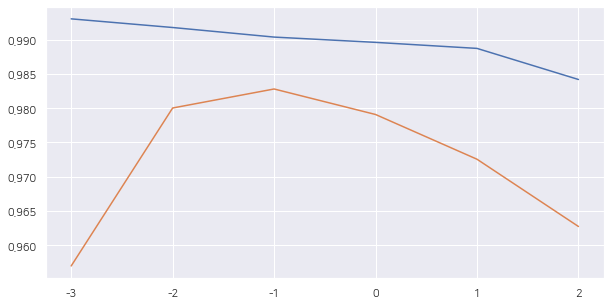

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(alpha_list), train_score) # 파란선
plt.plot(np.log10(alpha_list), test_score)  # 주황선
plt.show()  # 둘 다 동시에 떨어지기 시작하면 과소적합된것, 가장 적당한 값은 0.1

In [73]:
ridge = Ridge(alpha=0.1)  # 알파값을 변경해가면서 6번 생성됨
ridge.fit(X=train_scaled, y=train_target)

print(ridge.score(X=train_scaled, y=train_target))
print(ridge.score(X=test_scaled, y=test_target))

0.9903815817570366
0.9827976465386937


In [80]:
print(ridge.coef_)
print(ridge.intercept_)

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]
400.8333333333333


#### 라쏘회귀모델

In [78]:
from sklearn.linear_model import Lasso

In [79]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [81]:
print(lasso.coef_)  # 결정계수가 0이 나올 때가 있어서 오류가 생길 수도 있지만 특정 계수만 뽑아 사용해서 더 좋을 때도 있다
print(lasso.intercept_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
400.8333333333333
